<a href="https://colab.research.google.com/github/manashpratim/Facial-Expression-Recognition/blob/master/Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Downloading the dataset
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/64681/127167/fer20131.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561353681&Signature=reLsF1yri6BKDnH1ull9DHGDo2hIzIeQKt6mGz8xoiZ5uPSVnIx9%2BcJAx5XPdfulo8LgadzEr7iuJGK7Xv4VXiGMX7j6YFRbe%2FCFxIafWrpcSa32%2FRgG22mT%2FnXIsR4vRkBxJ21jy5aMRiXm3tP30tIUZLG2EPG4ZZffIGVDSxFPD%2BVaxvcw2BBvad84IuEoqmaQL5YqdoNZzAYrd1rGN%2FsBUifdt7hDiaZdI64tCnAXhN5WRU6plUnFxhn%2FpPjyRNuMJ0%2B5YBUuAzibdxmSQkq8YFuiF6tbSsbJzK5itfCD3eR04M1rUqe039EhU5DXmZQR%2F7bEY3LqNAF%2FXsBIZQ%3D%3D"\
      -O "/tmp/fer.zip"

--2019-06-21 06:09:56--  https://storage.googleapis.com/kaggle-datasets/64681/127167/fer20131.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561353681&Signature=reLsF1yri6BKDnH1ull9DHGDo2hIzIeQKt6mGz8xoiZ5uPSVnIx9%2BcJAx5XPdfulo8LgadzEr7iuJGK7Xv4VXiGMX7j6YFRbe%2FCFxIafWrpcSa32%2FRgG22mT%2FnXIsR4vRkBxJ21jy5aMRiXm3tP30tIUZLG2EPG4ZZffIGVDSxFPD%2BVaxvcw2BBvad84IuEoqmaQL5YqdoNZzAYrd1rGN%2FsBUifdt7hDiaZdI64tCnAXhN5WRU6plUnFxhn%2FpPjyRNuMJ0%2B5YBUuAzibdxmSQkq8YFuiF6tbSsbJzK5itfCD3eR04M1rUqe039EhU5DXmZQR%2F7bEY3LqNAF%2FXsBIZQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.27.80, 2404:6800:4004:80d::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.27.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96462978 (92M) [application/zip]
Saving to: ‘/tmp/fer.zip’

/tmp/fer.zip        100%[===================>]  91.99M  54.7MB/s    in 1.7s    

2019-06-21 06:10:03 (54.7 MB/s) - ‘/tmp/fer.zi

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/fer.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/fer')
zip_ref.close()

In [0]:
#The fer folder contains a .csv file containing the pixels and labels of the images.
import csv
fields = [] 
rows = [] 
import numpy as np

with open('/tmp/fer/fer20131.csv') as training_file:
    # creating a csv reader object 
    csvreader = csv.reader(training_file) 
      
    # extracting field names through first row 
    fields = next(csvreader) 
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row)

In [36]:
#The first column corresponds to the label, the second column corresponsd to the pixels of the images and the third column corresponds to the Training/Test label.
rows[0]

['0',
 '70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 5

In [0]:
#suffling the data
import random
rows=random.sample(rows,len(rows))

In [0]:
#Separating the Training and Test samples from the dataset
train_images=[]
train_labels=[]
test_images=[]
test_labels=[]
for i in range(len(rows)):
  if rows[i][2]=='Training':
    train_images.append(rows[i][1].split())
    train_labels.append(float(rows[i][0]))
  else:
    test_images.append(rows[i][1].split())
    test_labels.append(float(rows[i][0]))
  

In [0]:
#Converting the pixels of the images from string to float
for i in range(len(train_images)):
    train_images[i] = list(map(float, train_images[i]))
for i in range(len(test_images)):
    test_images[i] = list(map(float, test_images[i]))

In [0]:
# Converting the images and labels to numpy array
train_images=np.array(train_images)
test_images=np.array(test_images)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [0]:
train_img=np.zeros((len(train_images),48,48))
test_img=np.zeros((len(test_images),48,48))
#Reshaping the Images from 2304 pixels to 48x48
for i in range(len(train_images)):
  train_img[i]=train_images[i].reshape((48,48))
for i in range(len(test_images)):
  test_img[i]=test_images[i].reshape((48,48))

In [0]:
#Extending the dimension of the Images
train_img=np.expand_dims(train_img,axis=3)
test_img=np.expand_dims(test_img,axis=3)

In [44]:
#Data Summary
print('No. of training images: ',len(train_img))
print('No. of test images: ',len(test_img))
print('No. of classes in training data: ', len(np.unique(train_labels)))
print('No. of classes in test data: ', len(np.unique(test_labels)))
print('Dimension of training images: ',train_img.shape)
print('Dimension of test images: ',test_img.shape)
print('Dimension of training labels: ',train_labels.shape)
print('Dimension of test labels: ',test_labels.shape)

No. of training images:  28709
No. of test images:  7178
No. of classes in training data:  7
No. of classes in test data:  7
Dimension of training images:  (28709, 48, 48, 1)
Dimension of test images:  (7178, 48, 48, 1)
Dimension of training labels:  (28709,)
Dimension of test labels:  (7178,)


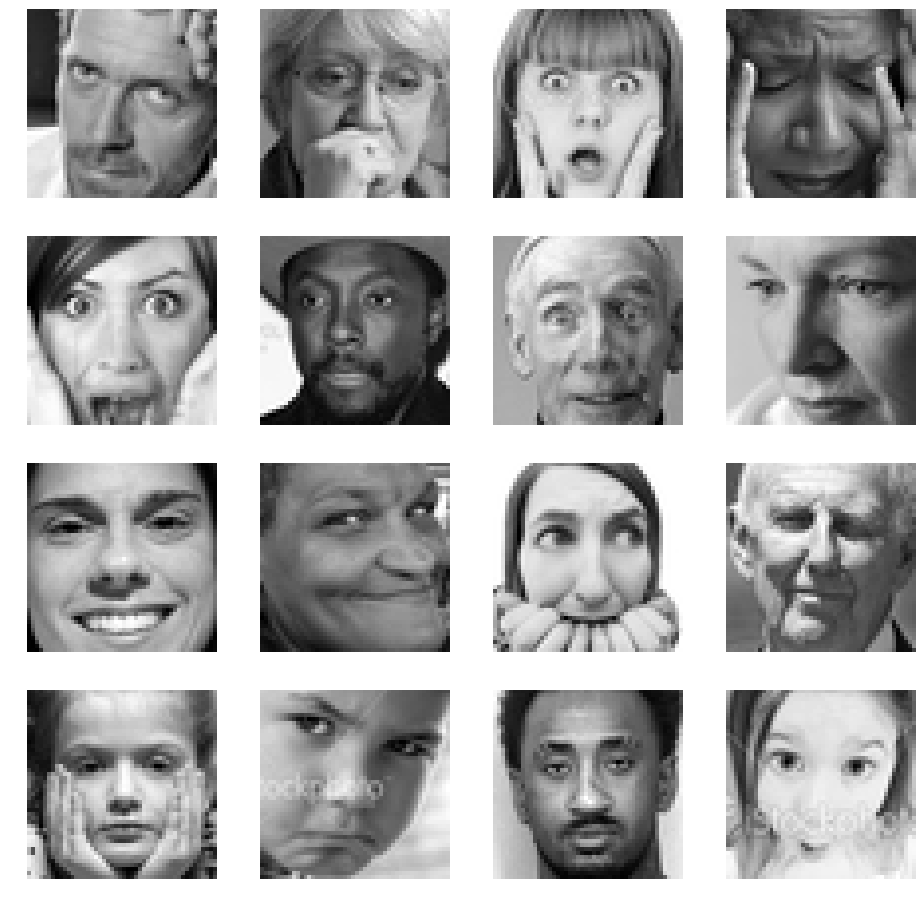

In [45]:
#Displaying the images of facial expressions
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#We'll output images in a 2X4 configuration.  

nrows=4
ncols=4

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

for i in range(len(train_img[:16])):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  X = np.squeeze(train_img[i], axis=(2,)) # sample 2D array
  plt.imshow(X, cmap="gray")
plt.show()


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
"""train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')"""

train_datagen = ImageDataGenerator(rescale = 1./255)                                
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7,activation='softmax')
])

In [72]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(
  train_datagen.flow(train_img,train_labels,batch_size=100),
  steps_per_epoch=len(train_img)/100,
  epochs=10,
  validation_data=test_datagen.flow(test_img,test_labels,batch_size=10),
  validation_steps=len(test_img)/10,
  verbose=1
)

Epoch 1/50
288/287 [==============================] - 10s 33ms/step - loss: 0.0453 - acc: 0.9862 - val_loss: 2.3259 - val_acc: 0.6043
Epoch 2/50
288/287 [==============================] - 8s 26ms/step - loss: 0.0382 - acc: 0.9884 - val_loss: 2.3372 - val_acc: 0.6073
Epoch 3/50
288/287 [==============================] - 8s 26ms/step - loss: 0.0402 - acc: 0.9888 - val_loss: 2.3306 - val_acc: 0.6048
Epoch 4/50
288/287 [==============================] - 8s 26ms/step - loss: 0.0355 - acc: 0.9897 - val_loss: 2.3450 - val_acc: 0.6053
Epoch 5/50
288/287 [==============================] - 8s 26ms/step - loss: 0.0361 - acc: 0.9904 - val_loss: 2.3547 - val_acc: 0.6031
Epoch 6/50
288/287 [==============================] - 8s 26ms/step - loss: 0.0320 - acc: 0.9916 - val_loss: 2.3744 - val_acc: 0.6046
Epoch 7/50
288/287 [==============================] - 8s 26ms/step - loss: 0.0324 - acc: 0.9906 - val_loss: 2.3804 - val_acc: 0.6062
Epoch 8/50
288/287 [==============================] - 8s 26ms/step -

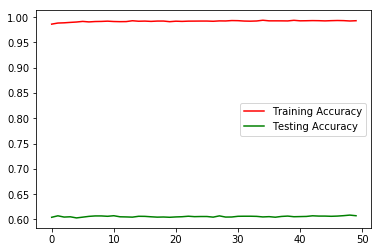

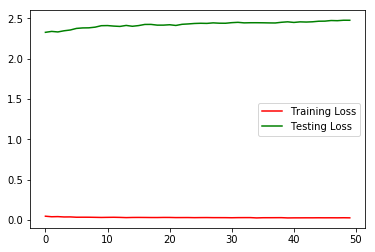

In [73]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()